![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bike store sales

In this class we'll be analyzing sales made on bike stores.

[Follow this data in a Google Spreadsheet](https://docs.google.com/spreadsheets/d/1NOe_UrPx6ULF2C5MvHmZ9ODuw8t9M77Q1Y64gP-7JHA/edit?usp=sharing)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [2]:
!head data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

In [3]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
sales.shape # Number of rows and columns in DataFrame

(113036, 18)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
sales.describe() # statistical info on numerical data

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `Unit_Cost` column:

In [8]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [9]:
sales['Unit_Cost'].mean()

267.296365759581

In [10]:
sales['Unit_Cost'].median()

9.0

<Axes: >

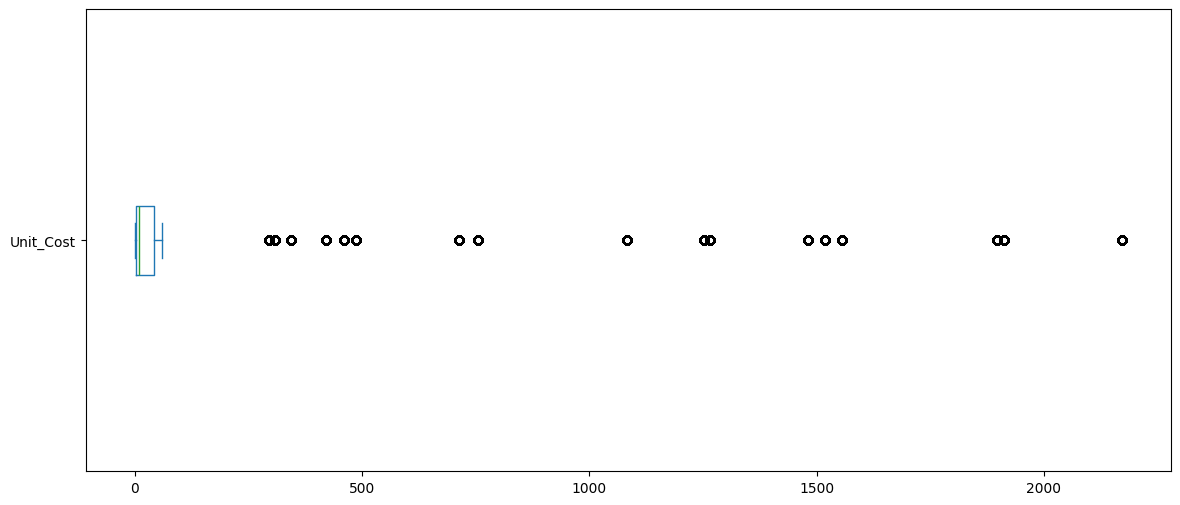

In [11]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

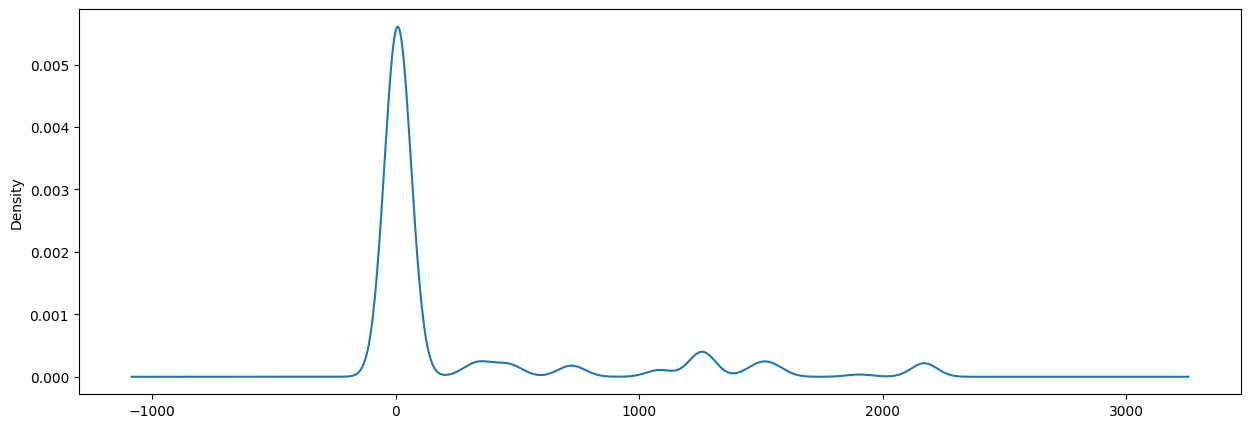

In [12]:
sales['Unit_Cost'].plot(kind='density', figsize=(15,5)) # kde

matplotlib.axes._axes.Axes

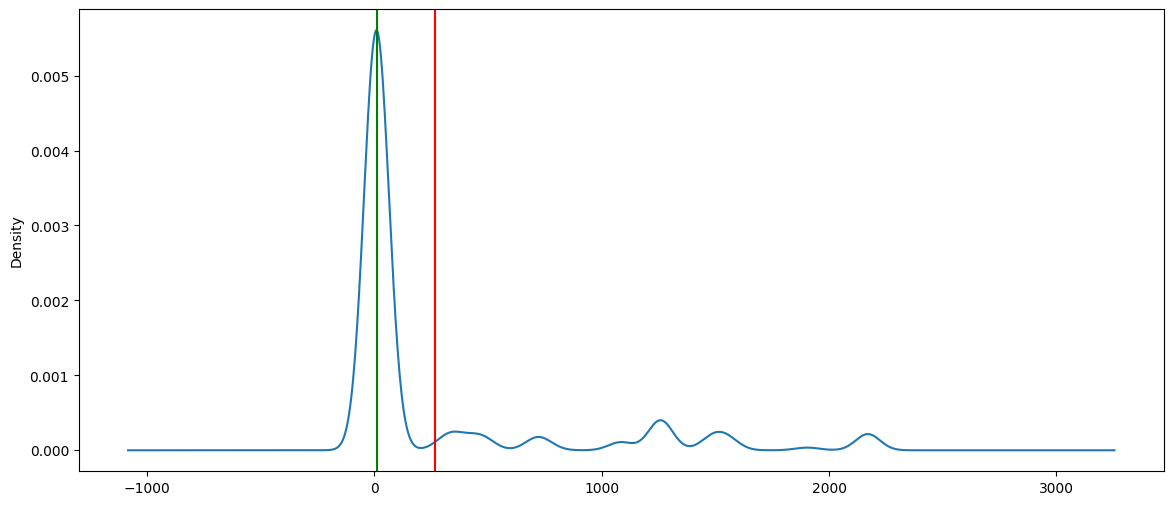

In [13]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')
type(ax)

Text(0.5, 0, 'dollars')

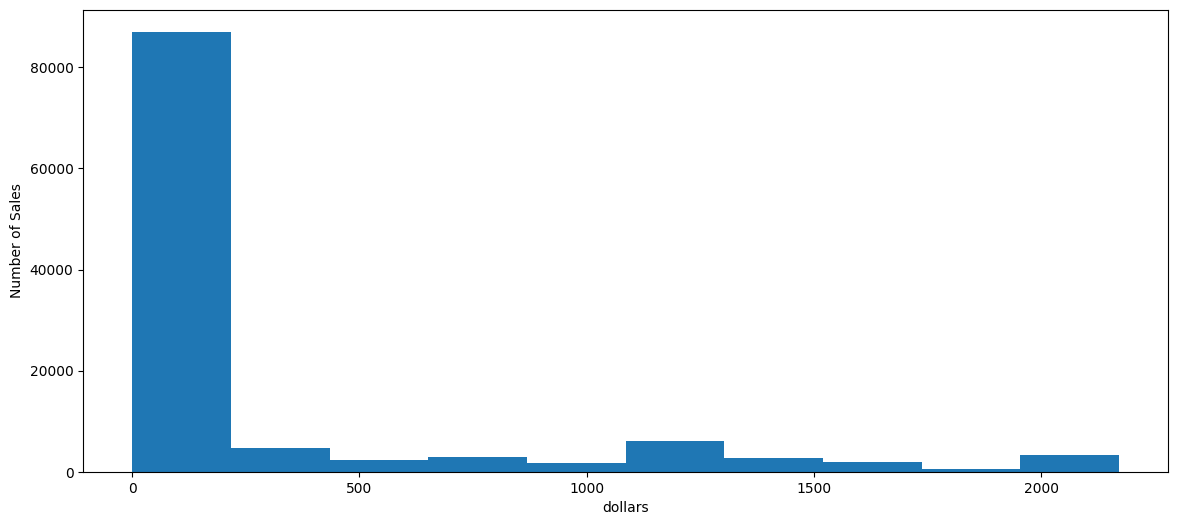

In [14]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `Age_Group` column:

In [15]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [16]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

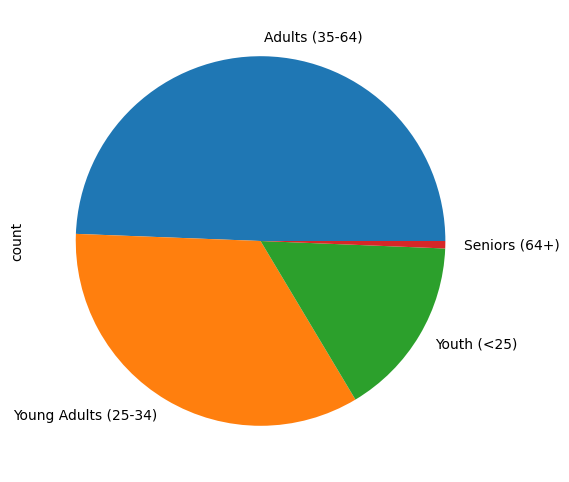

In [17]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

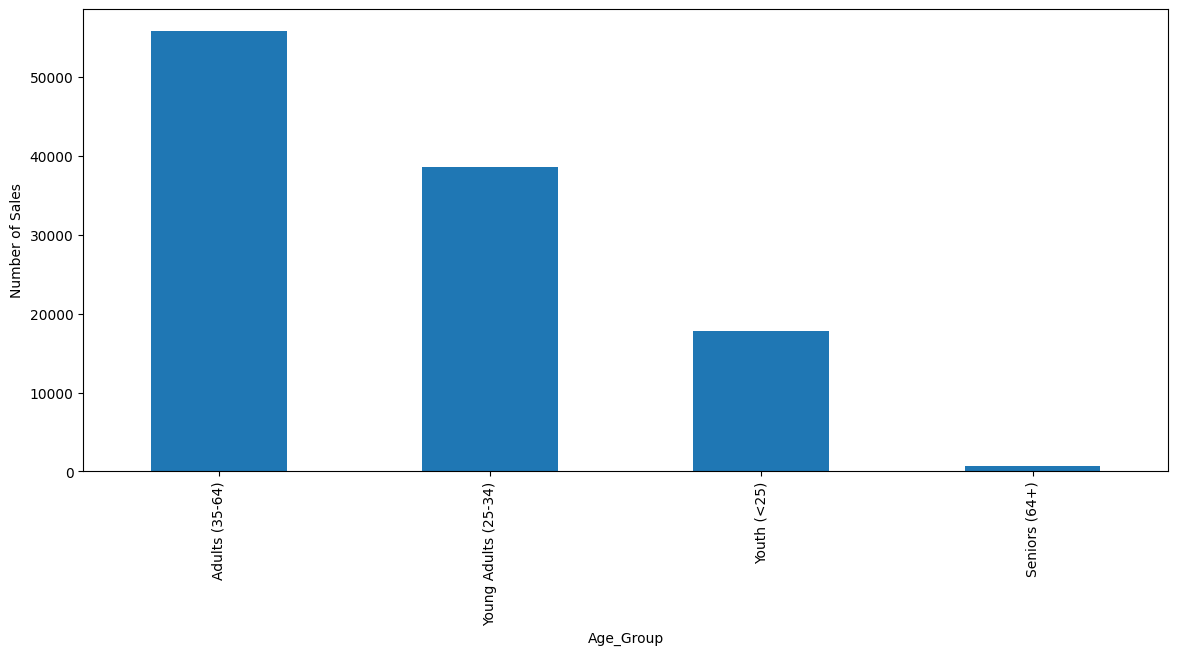

In [21]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6)) #try both hist and bar
ax.set_ylabel('Number of Sales')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns?

Can we find any significant relationship?

In [22]:
corr = sales[['Cost','Day','Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]
corr = corr.corr()

corr

,Cost,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Cost,1.000000,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Day,0.003329,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.215604,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.016013,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.340382,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.829869,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.826301,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.902233,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,1.000000,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.988758,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


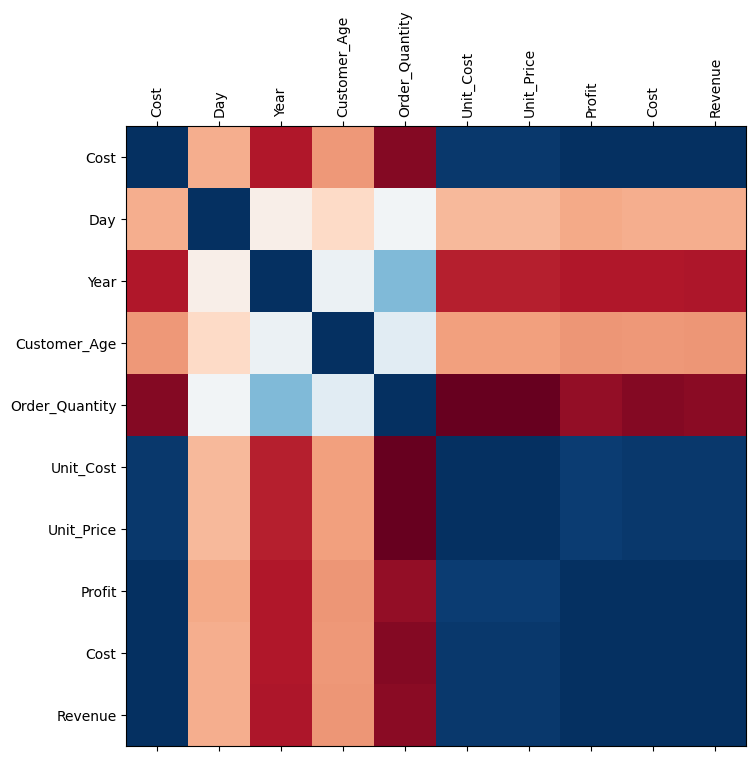

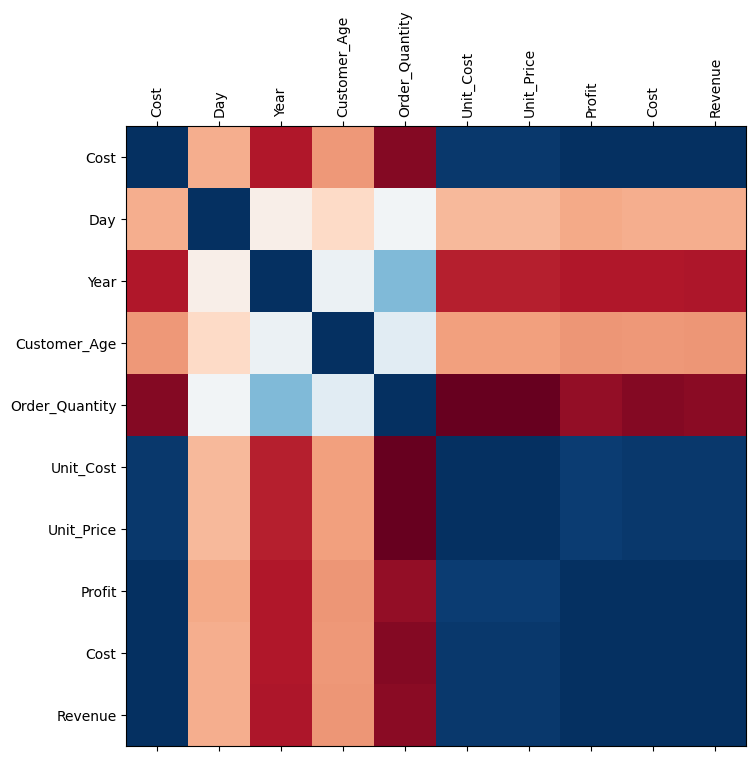

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
fig




<Axes: xlabel='Customer_Age', ylabel='Revenue'>

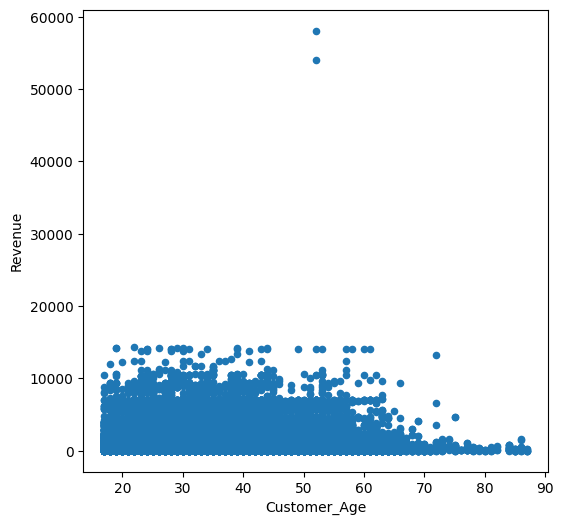

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<Axes: xlabel='Revenue', ylabel='Profit'>

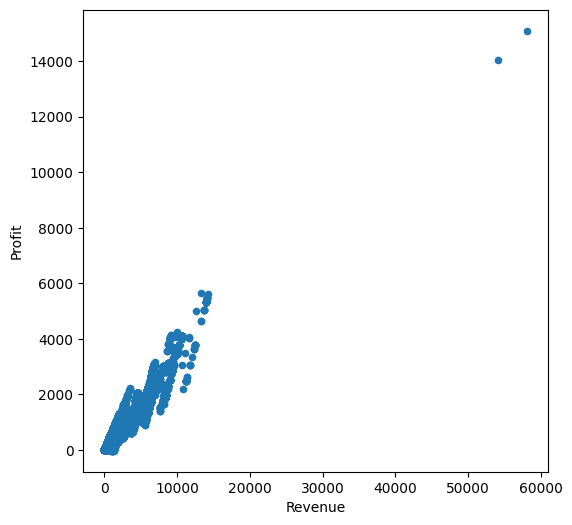

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

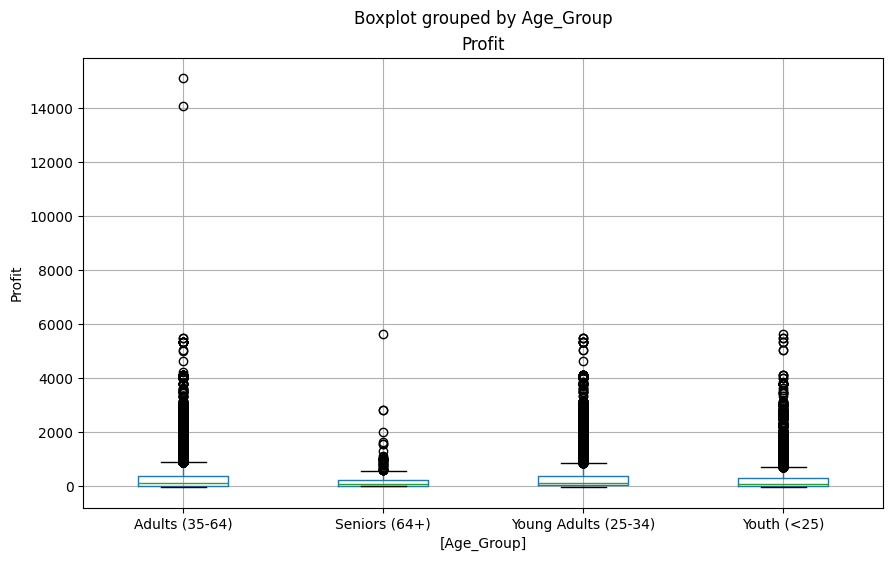

In [24]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

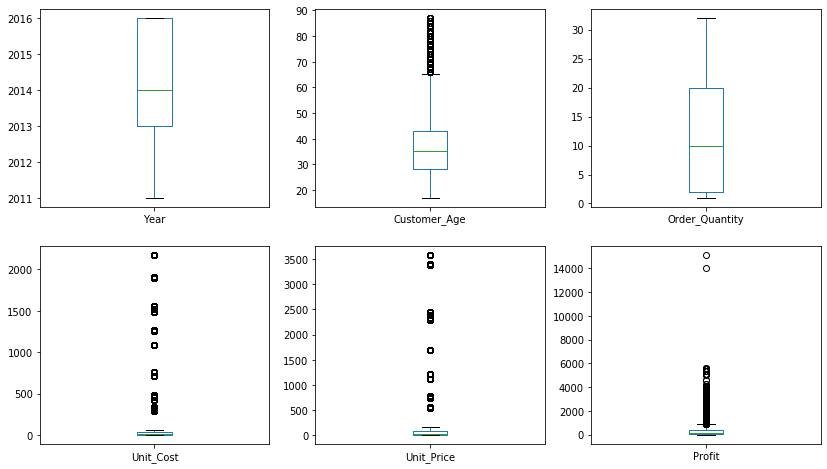

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new `Revenue_per_Age` column

In [25]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

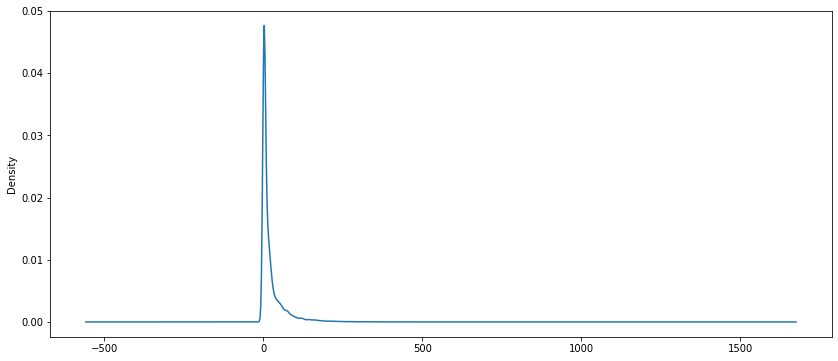

In [ ]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

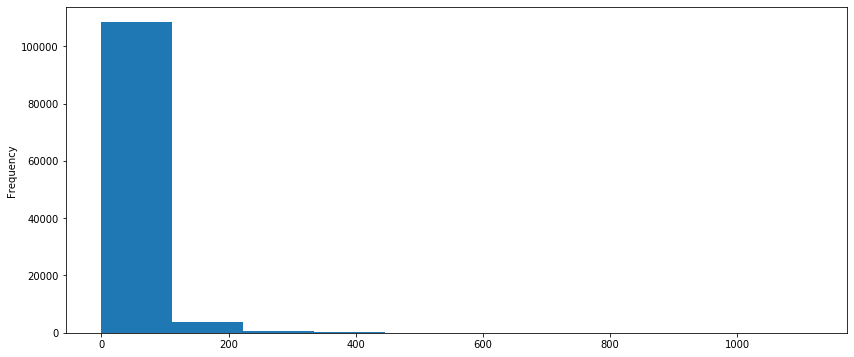

In [ ]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

### Add and calculate a new `Calculated_Cost` column

Use this formula

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [ ]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [ ]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

We can see the relationship between `Cost` and `Profit` using a scatter plot:

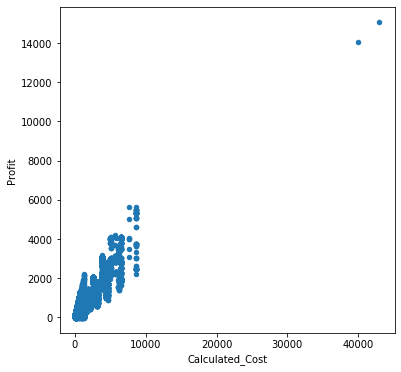

In [ ]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

### Add and calculate a new `Calculated_Revenue` column

Use this formula

$$ Calculated\_Revenue = Cost + Profit $$

In [ ]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [ ]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


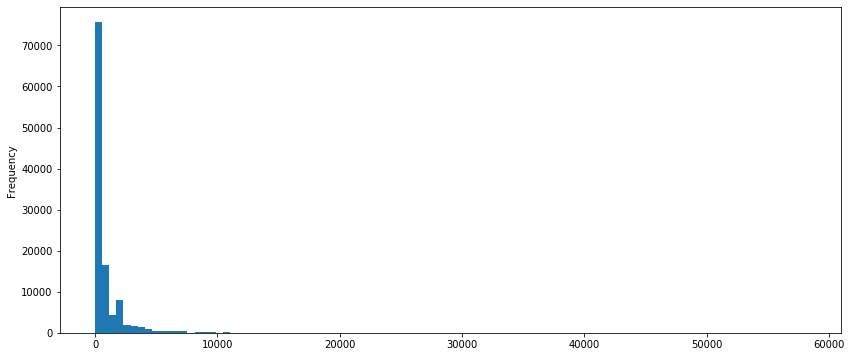

In [ ]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

### Modify all `Unit_Price` values adding 3% tax to them

In [ ]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [ ]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [ ]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get all the sales made in the state of `Kentucky`

In [ ]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


### Get the mean revenue of the `Adults (35-64)` sales group

In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [ ]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group `Adults (35-64)` in `United States`

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)